<a href="https://colab.research.google.com/github/JyothiSatti/EDA_of_Car_Features/blob/master/EDA_of_car_features_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Introduction 


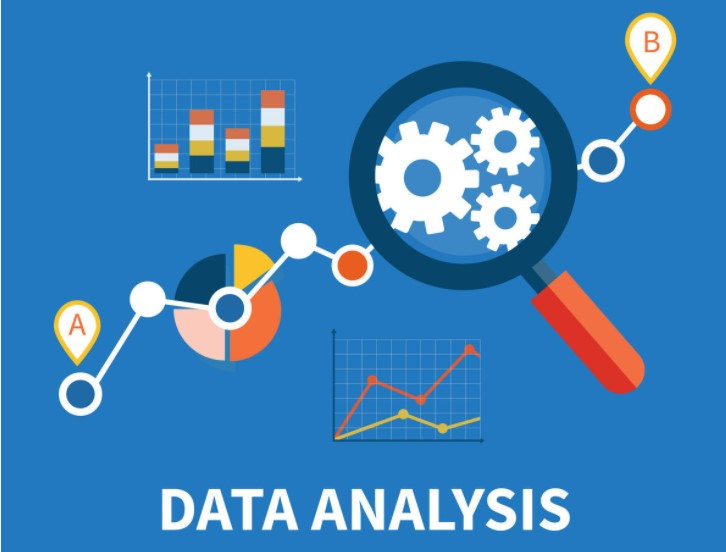

**EXPLORATORY DATA ANALYSIS (EDA)**

Exploratory Data Analysis helps us to give insights about dataset. Understanding it and extracting relationships that hold between them. It ensures whether our our dataset is ready for using a machine learning algorithm on it. And also helps us in finding the most suitable algorithm for our dataset.

We use summary statistics and graphical representations mostly in EDE. Knowing and understanding the data before applying any algorithm helps us choose the data that is actually required for our algorithm to best fit and give great results.

In this project **Exploratory Data Analysis of Car Features** we will predict the price of cars. We will first go through data and get some insights from that and then proceed to train and test our model with multiple algorithms to find which fits the best and gives optimum results.

# Importing Libraries

In [ ]:
#importing libraries that are actually required for loading our data
import pandas as pd
import numpy as np

# Loading Data and Renaming

In [ ]:
# loading data and observing first 5 rows 
data=pd.read_csv('data.csv') 
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
#shape
data.shape

(11914, 16)

In [ ]:
#last 5 rows
data.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [ ]:
# Statistical summary
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
# renaming columns
data=data.rename(columns={"Engine HP":"HP","Engine Cylinders":"Cylinders","Driven_Wheels": "Drive Mode","Transmission Type": "Transmission","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              11914 non-null  object 
 1   Model             11914 non-null  object 
 2   Year              11914 non-null  int64  
 3   Engine Fuel Type  11911 non-null  object 
 4   HP                11845 non-null  float64
 5   Cylinders         11884 non-null  float64
 6   Transmission      11914 non-null  object 
 7   Drive Mode        11914 non-null  object 
 8   Number of Doors   11908 non-null  float64
 9   Market Category   8172 non-null   object 
 10  Vehicle Size      11914 non-null  object 
 11  Vehicle Style     11914 non-null  object 
 12  MPG-H             11914 non-null  int64  
 13  MPG-C             11914 non-null  int64  
 14  Popularity        11914 non-null  int64  
 15  Price             11914 non-null  int64  
dtypes: float64(3), int64(5), object(8)
memor

# Dropping Duplicates

Some datasets have duplicates.
Dropping them helps in creating reliable dataset.This improves the quality of the training data for analytics and enables accurate decision-making.

In [ ]:
data=data.drop_duplicates()
data.shape

(11199, 16)

# Plotting Graphs and Removing Outliers

Removing outliers is the most important part of data cleaning. Having outliers in dataset misleads machine learning model to make wrong conclusions and give wrong predictions.

For finding outliers we can use box plots scatter plots to see the trends in dataset

In [ ]:
#importing libraries that are required for plotting graphs
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Number of doors')]

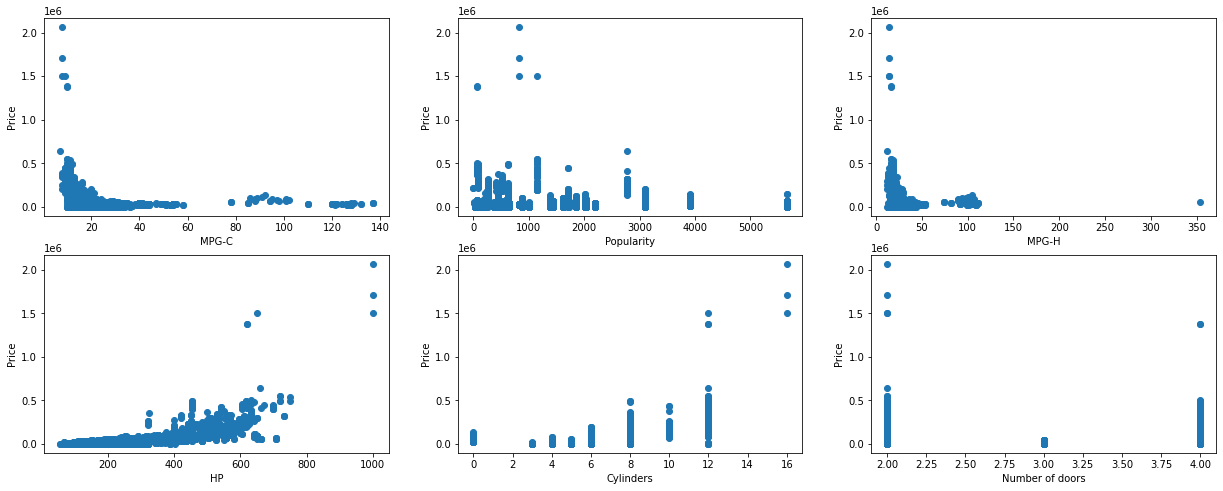

In [ ]:
#scatter plots 
f, axes = plt.subplots(2, 3,figsize=(21, 8))
axes[0, 0].scatter(x=data['MPG-C'],y=data['Price'])
axes[0, 1].scatter(x=data['Popularity'],y=data['Price'])
axes[0, 2].scatter(x=data['MPG-H'],y=data['Price'])
axes[1, 0].scatter(x=data['HP'],y=data['Price'])
axes[1, 1].scatter(x=data['Cylinders'],y=data['Price'])
axes[1, 2].scatter(x=data['Number of Doors'],y=data['Price'])
plt.setp(axes[0,0], ylabel='Price',xlabel='MPG-C')
plt.setp(axes[0,1], ylabel='Price',xlabel='Popularity')
plt.setp(axes[0,2], ylabel='Price',xlabel='MPG-H')
plt.setp(axes[1,0], ylabel='Price',xlabel='HP')
plt.setp(axes[1,1], ylabel='Price',xlabel='Cylinders')
plt.setp(axes[1,2], ylabel='Price',xlabel='Number of doors')

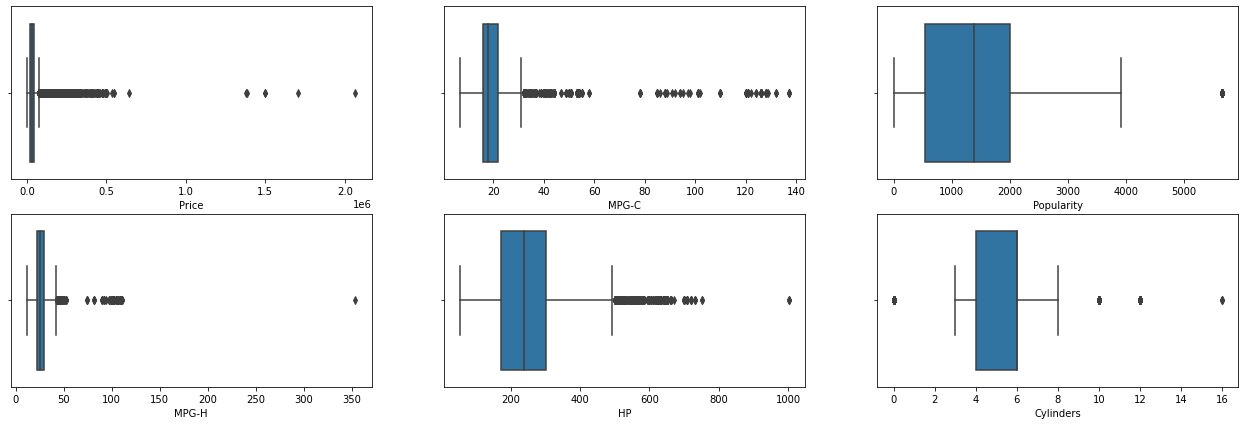

In [ ]:
# box plots
f, axes = plt.subplots(2, 3,figsize=(22, 7))
sns.boxplot(x=data['Price'],ax=axes[0, 0])
sns.boxplot(x=data['MPG-C'],ax=axes[0, 1])
sns.boxplot(x=data['Popularity'],ax=axes[0, 2])
sns.boxplot(x=data['MPG-H'],ax=axes[1, 0])
sns.boxplot(x=data['HP'],ax=axes[1, 1])
sns.boxplot(x=data['Cylinders'],ax=axes[1, 2])



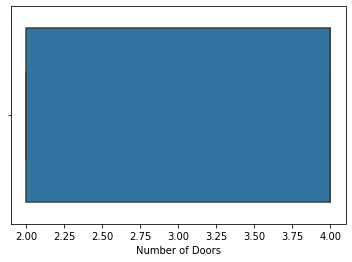

In [ ]:
sns.boxplot(x=data['Number of Doors'])

From these two plots we can see that there are many outliers. They can be removed by following method. 

In [ ]:
# inter quartile range and quartile range
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
Q0 = data.quantile(0)
Q4 = data.quantile(1)
QR = Q4 - Q0
print(QR)

Year                   9.0
HP                   131.0
Cylinders              2.0
Number of Doors        2.0
MPG-H                  8.0
MPG-C                  6.0
Popularity          1460.0
Price              21433.0
dtype: float64
Year                    27.0
HP                     946.0
Cylinders               16.0
Number of Doors          2.0
MPG-H                  342.0
MPG-C                  130.0
Popularity            5655.0
Price              2063902.0
dtype: float64


In [ ]:
# removing outliers and finding shape
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(8642, 16)

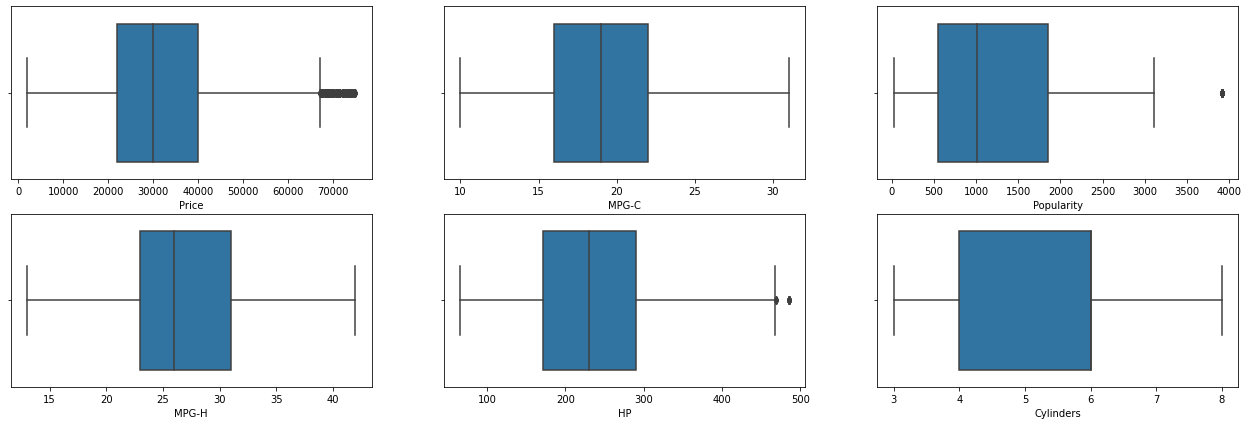

In [ ]:
#plotting box plot again to see outliers removed
f, axes = plt.subplots(2, 3,figsize=(22, 7))
sns.boxplot(x=data['Price'],ax=axes[0, 0])
sns.boxplot(x=data['MPG-C'],ax=axes[0, 1])
sns.boxplot(x=data['Popularity'],ax=axes[0, 2])
sns.boxplot(x=data['MPG-H'],ax=axes[1, 0])
sns.boxplot(x=data['HP'],ax=axes[1, 1])
sns.boxplot(x=data['Cylinders'],ax=axes[1, 2])



# Replacing Missing Values

Many datasets tend to have missing values represented by NaN or any other way. They are to be handled carefully either by removing them or replacing them with other values in the dataset.

Here we can find no of missing values by isnull().

In [ ]:
data.isnull().sum()

Make                   0
Model                  0
Year                   0
Engine Fuel Type       3
HP                    11
Cylinders             19
Transmission           0
Drive Mode             0
Number of Doors        0
Market Category     2817
Vehicle Size           0
Vehicle Style          0
MPG-H                  0
MPG-C                  0
Popularity             0
Price                  0
dtype: int64

From this missing values we can see that out of around 6000 rows 2157 rows of Market Category which is nearly 40% of total data, so filling them in some or other way might not help in analysing the data.And market category may not be that related to price so dropping that will not effect much in analysing data.

And also most people will not actually see whether fuel type is leaded or unleaded or of any type while buying it so that column can also be dropped.

In [ ]:
# dropping Market Category Column
data=data.drop(columns={'Market Category','Engine Fuel Type'})

In [ ]:
#ffill is applied missing values are filled by the value in previous row in the same column.
data=data.fillna( method='ffill')

In [ ]:
# alla missing values are filled
data.isnull().sum()

Make               0
Model              0
Year               0
HP                 0
Cylinders          0
Transmission       0
Drive Mode         0
Number of Doors    0
Vehicle Size       0
Vehicle Style      0
MPG-H              0
MPG-C              0
Popularity         0
Price              0
dtype: int64

# Finding Average Price of Top Car Brands

In [ ]:
# no of cars per brand
cars_per_brand= data['Make'].value_counts()
cars_per_brand

Chevrolet        1033
Toyota            632
Volkswagen        515
Nissan            513
GMC               469
Dodge             425
Mazda             397
Honda             373
Suzuki            339
Infiniti          322
Cadillac          300
Hyundai           242
Audi              240
Volvo             236
Acura             232
Subaru            220
BMW               218
Kia               216
Buick             184
Mitsubishi        179
Chrysler          173
Mercedes-Benz     171
Lexus             163
Pontiac           157
Lincoln           146
Saab              109
Oldsmobile        105
Land Rover         91
FIAT               59
Scion              55
Plymouth           43
Porsche            36
Lotus              20
HUMMER             17
Alfa Romeo          5
Maserati            4
Genesis             3
Name: Make, dtype: int64

In [ ]:
#calculating percentage of each company cars
percent=data['Make'].value_counts()*100/sum(data['Make'].value_counts())
# car brands
brands = percent.index[:]
brands

Index(['Chevrolet', 'Toyota', 'Volkswagen', 'Nissan', 'GMC', 'Dodge', 'Mazda',
       'Honda', 'Suzuki', 'Infiniti', 'Cadillac', 'Hyundai', 'Audi', 'Volvo',
       'Acura', 'Subaru', 'BMW', 'Kia', 'Buick', 'Mitsubishi', 'Chrysler',
       'Mercedes-Benz', 'Lexus', 'Pontiac', 'Lincoln', 'Saab', 'Oldsmobile',
       'Land Rover', 'FIAT', 'Scion', 'Plymouth', 'Porsche', 'Lotus', 'HUMMER',
       'Alfa Romeo', 'Maserati', 'Genesis'],
      dtype='object')

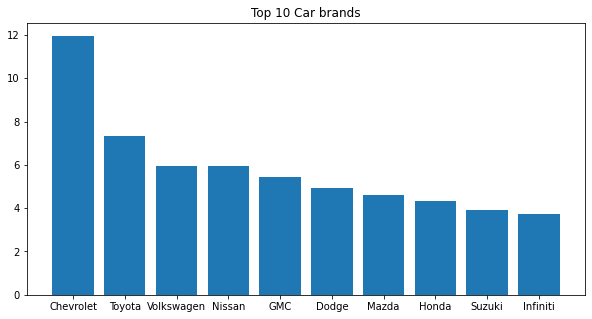

In [ ]:
# Plotting bar graph of top 10 car brands
plt.figure(figsize=(10,5))
plt.bar(brands[:10], height=percent[:10])
plt.title('Top 10 Car brands')
plt.show()

In [ ]:
# finding average price of top 10 brands
avg_price = data[['Make','Price']].loc[(data['Make'] == 'Chevrolet')|
                                  (data['Make'] == 'Toyota')|
                                  (data['Make'] == 'Nissan')|
                                  (data['Make'] == 'GMC')|
                                  (data['Make'] == 'Volkswagen')|
                                  (data['Make'] == 'Suzuki')|
                                  (data['Make'] == 'Dodge')|
                                  (data['Make'] == 'Mazda')|
                                  (data['Make'] == 'Honda')|
                                  (data['Make'] == 'Infiniti')].groupby('Make').mean()
avg_price=avg_price.rename(columns={'Price':'Average_price'})                                  
print(avg_price)

            Average_price
Make                     
Chevrolet    28207.045499
Dodge        26076.722353
GMC          33261.400853
Honda        27381.364611
Infiniti     43127.822981
Mazda        20830.670025
Nissan       28352.543860
Suzuki       18168.241888
Toyota       29022.944620
Volkswagen   29032.817476


# Plotting Co-Relation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data finding dependence between varables.

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Number of doors')]

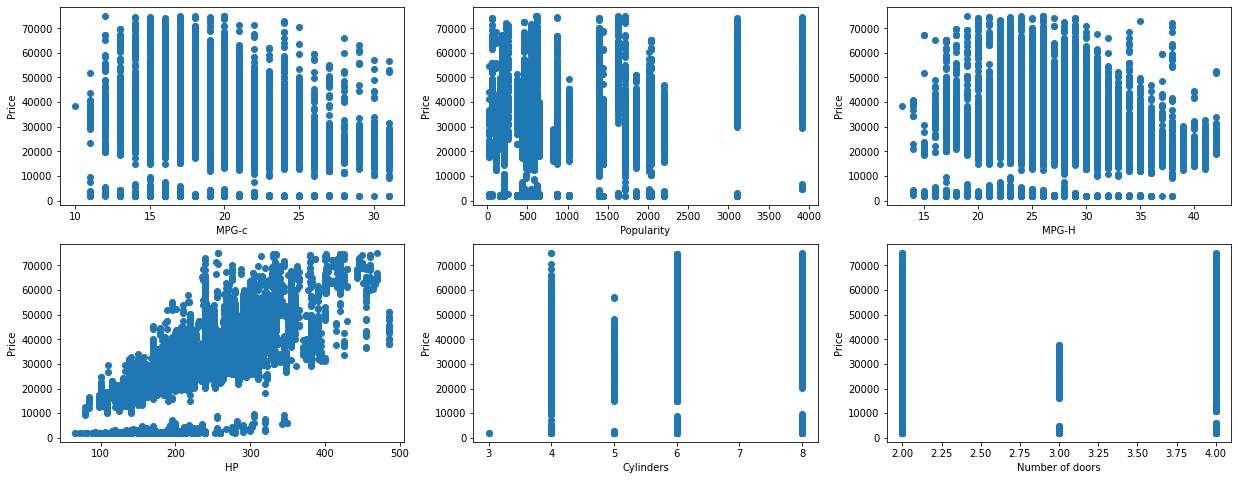

In [ ]:
# plotting scatter plots for finding dependence between other variables and price
f, axes = plt.subplots(2, 3,figsize=(21, 8))
axes[0, 0].scatter(x=data['MPG-C'],y=data['Price'])
axes[0, 1].scatter(x=data['Popularity'],y=data['Price'])
axes[0, 2].scatter(x=data['MPG-H'],y=data['Price'])
axes[1, 0].scatter(x=data['HP'],y=data['Price'])
axes[1, 1].scatter(x=data['Cylinders'],y=data['Price'])
axes[1, 2].scatter(x=data['Number of Doors'],y=data['Price'])
plt.setp(axes[0,0], ylabel='Price',xlabel='MPG-c')
plt.setp(axes[0,1], ylabel='Price',xlabel='Popularity')
plt.setp(axes[0,2], ylabel='Price',xlabel='MPG-H')
plt.setp(axes[1,0], ylabel='Price',xlabel='HP')
plt.setp(axes[1,1], ylabel='Price',xlabel='Cylinders')
plt.setp(axes[1,2], ylabel='Price',xlabel='Number of doors')

From these scatter plots we may conclude that number of doors do not effect price much so we can drop that column too.

In [ ]:
data=data.drop(columns='Number of Doors')

In [ ]:
#correlation matrix
corrmat=data.corr()
corrmat

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.330630,-0.094762,0.359965,0.323866,0.204836,0.592643
HP,0.330630,1.000000,0.739985,-0.464423,-0.562205,0.105419,0.742825
Cylinders,-0.094762,0.739985,1.000000,-0.697946,-0.750936,0.024795,0.391045
MPG-H,0.359965,-0.464423,-0.697946,1.000000,0.937949,0.082286,-0.127055
MPG-C,0.323866,-0.562205,-0.750936,0.937949,1.000000,0.072011,-0.201541
Popularity,0.204836,0.105419,0.024795,0.082286,0.072011,1.000000,0.115735
Price,0.592643,0.742825,0.391045,-0.127055,-0.201541,0.115735,1.000000


From this correlation matrix we can see among input variables,

HP & Cylinders are highly correlated as No of cylinders increase horse power increases.

Cylinders & MPG-H and Cylinders & MPG-C are highly anti correlated as lower MPG means higher fuel consumption.

Popularity is also highly related to MPG-H & MPG-C.

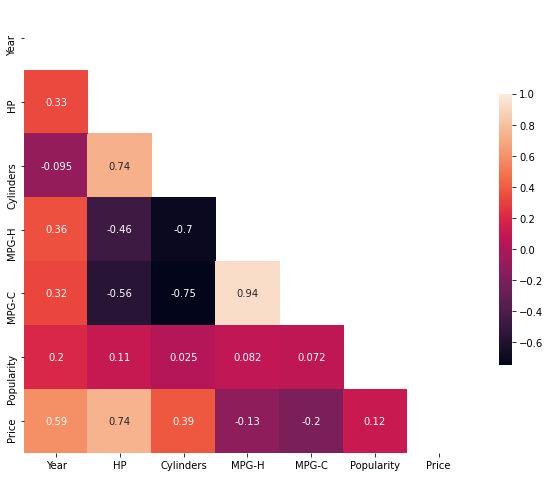

In [ ]:
# heatmap for visualising correlation matrix
corrmat=data.corr()
plt.subplots(figsize=(10,10))
mask=np.zeros_like(corrmat,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corrmat,vmax=1,square=True,annot=True,mask=mask,cbar_kws={"shrink":.5})

# Documenting Findings

In [ ]:
models=data['Model'].value_counts()
models

Silverado 1500    156
Tundra            129
Sierra 1500        90
Frontier           76
Accord             74
                 ... 
Sierra C3           1
iA                  1
323                 1
Vigor               1
XC                  1
Name: Model, Length: 648, dtype: int64

From this we can say that there are 648 models with Silverado 1500,tundra followed by sierra 1500 are the most sold car models.

Text(0.5, 1.0, 'No of cars of different Transmission type sold')

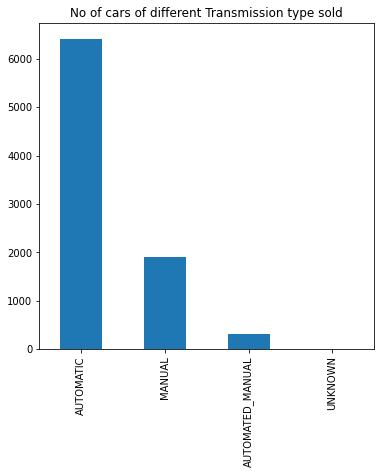

In [ ]:
data['Transmission'].value_counts().plot.bar(figsize=(6,6))
plt.title("No of cars of different Transmission type sold")

Most of the cars that are sold are automatic.

Text(0.5, 1.0, 'No of cars sold by type of drive wheels')

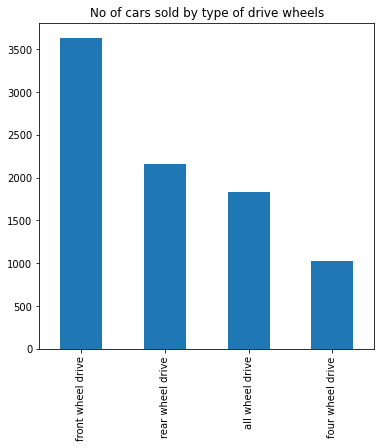

In [ ]:
data['Drive Mode'].value_counts().plot.bar(figsize=(6,6))
plt.title("No of cars sold by type of drive wheels")

Front wheel drive is mostly preferred by buyers than reaer wheel and all wheel

Text(0.5, 1.0, 'No of cars sold by size')

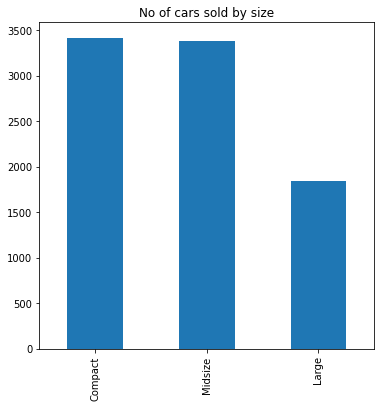

In [ ]:
data['Vehicle Size'].value_counts().plot.bar(figsize=(6,6))
plt.title("No of cars sold by size")

Large size cars are less preferred than mid and compact sized cars

Text(0.5, 1.0, 'No of cars sold by style')

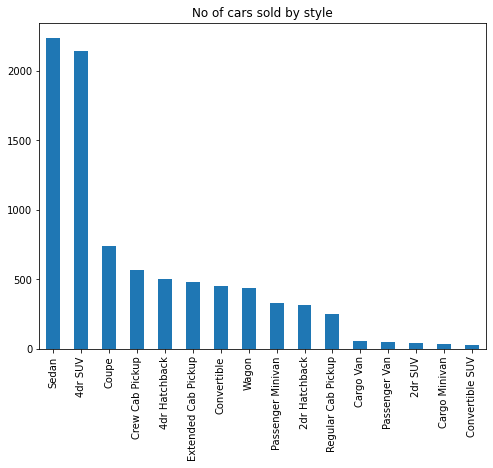

In [ ]:
data['Vehicle Style'].value_counts().plot.bar(figsize=(8,6))
plt.title("No of cars sold by style")

Sedan cars were the most sold cars followed by 4dr SUV and coupe

In [ ]:
data.Price.value_counts()

2000     313
29995     17
20995     15
25995     14
21995     14
        ... 
2789       1
29410      1
19165      1
23255      1
4098       1
Name: Price, Length: 4788, dtype: int64

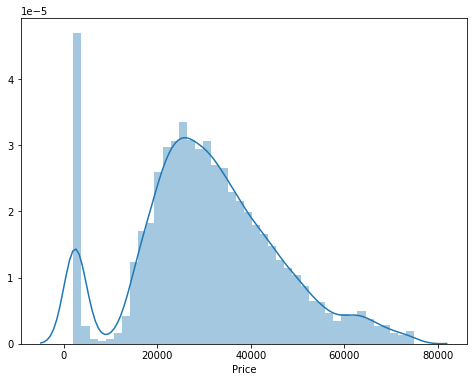

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(data.Price)

In [ ]:
price = pd.cut(data['Price'],[0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,600000], 
                                labels = ['<10K','10-19K','20-29K','30-39K','40-49K','50-59K','60-69K','70-79K','80-89K','90-99k','>100K'], include_lowest = True)
price= price.astype(object)

Text(0.5, 0, 'Price Range')

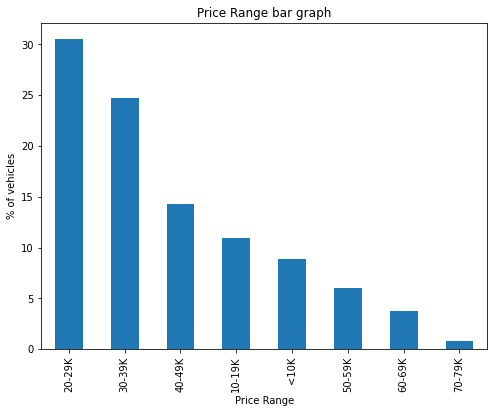

In [ ]:
(price.value_counts() / len(price) *100).plot.bar(figsize=(8,6))
plt.title("Price Range bar graph")
plt.ylabel('% of vehicles')
plt.xlabel('Price Range')

Most of the cars sold are of range 20-30 k followed by 30-50 k
Cars that are of less cost are less sold and cars with high cost are least sold.

# Building Machine Learning Model


Till now we have dealt with cleaning data now we will be bulding models for predicting price.

We mostly dealt with numerical data. But for analysis we have to deal with both numerical and categorical data . Algorithms can not always deal with categorical data so one hot encoding of categorical data is required to use them in a machine learning model.

In [ ]:
# taking dependent variable as x and independent variables as y
x=data[['Make','Model','Year','HP','Cylinders','Transmission','Drive Mode','Vehicle Size','Vehicle Style','MPG-H','MPG-C','Popularity']]
y=data['Price'].values

In [ ]:
# listing columns with categorical data
obj_columns=list(x.select_dtypes(include=['object']).columns)

In [ ]:
# dataset after one hot encoding
xohe=pd.get_dummies(data=x,columns=obj_columns)
xohe.head(2)

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Make_Acura,Make_Alfa Romeo,Make_Audi,Make_BMW,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_FIAT,Make_GMC,Make_Genesis,Make_HUMMER,Make_Honda,Make_Hyundai,Make_Infiniti,Make_Kia,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_Lotus,Make_Maserati,Make_Mazda,Make_Mercedes-Benz,Make_Mitsubishi,Make_Nissan,Make_Oldsmobile,Make_Plymouth,Make_Pontiac,Make_Porsche,Make_Saab,Make_Scion,Make_Subaru,Make_Suzuki,...,Model_Z3,Model_Z4,Model_Z4 M,Model_ZDX,Model_Zephyr,Model_allroad,Model_allroad quattro,Model_iA,Model_iM,Model_tC,Model_xA,Model_xB,Model_xD,Transmission_AUTOMATED_MANUAL,Transmission_AUTOMATIC,Transmission_MANUAL,Transmission_UNKNOWN,Drive Mode_all wheel drive,Drive Mode_four wheel drive,Drive Mode_front wheel drive,Drive Mode_rear wheel drive,Vehicle Size_Compact,Vehicle Size_Large,Vehicle Size_Midsize,Vehicle Style_2dr Hatchback,Vehicle Style_2dr SUV,Vehicle Style_4dr Hatchback,Vehicle Style_4dr SUV,Vehicle Style_Cargo Minivan,Vehicle Style_Cargo Van,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,26,19,3916,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,28,19,3916,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
x=xohe.values
x,y

(array([[2.011e+03, 3.350e+02, 6.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.011e+03, 3.000e+02, 6.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.011e+03, 3.000e+02, 6.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [2.012e+03, 3.000e+02, 6.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.013e+03, 3.000e+02, 6.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.006e+03, 2.210e+02, 6.000e+00, ..., 0.000e+00, 1.000e+00,
         0.000e+00]]), array([46135, 40650, 36350, ..., 50620, 50920, 28995]))

In [ ]:
# splitting data into training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

# Linear Regression

In [ ]:
#importing linear regression model and fitting data
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# predicting
y_pred=regressor.predict(x_test)
y_pre=regressor.predict(x_train)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print('mean Squared Error:',mean_squared_error(y_test,y_pred))
print('root mean Squared Error:',np.sqrt((mean_squared_error(y_test,y_pred))))
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('r2 score for test set:',r2_score(y_test,y_pred))
print('r2 score for training set:',r2_score(y_train,y_pre))

mean Squared Error: 13359456.605422052
root mean Squared Error: 3655.0590426725053
mean absolute error: 2578.9095670754555
r2 score for test set: 0.9402178743550815
r2 score for training set: 0.9538005084473684


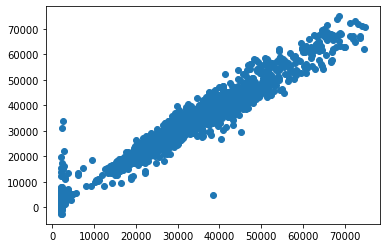

In [ ]:
plt.scatter(y_test,y_pred)

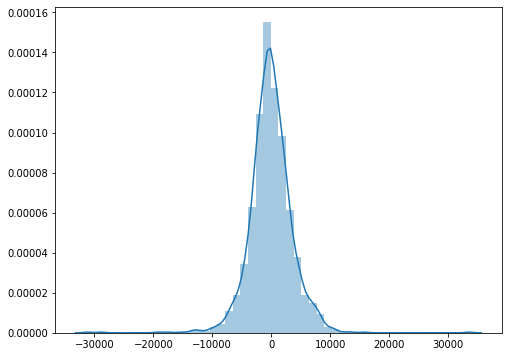

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot((y_test-y_pred))

r2 score for linear regression is pretty good there is no much difference between r2 score of test and train data so there is no under or over fitting.

# SVR

In [ ]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pre=regressor.predict(x_train)

In [ ]:
print('mean Squared Error:',mean_squared_error(y_test,y_pred))
print('root mean Squared Error:',np.sqrt((mean_squared_error(y_test,y_pred))))
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('r2 score for test set:',r2_score(y_test,y_pred))
print('r2 score for training set:',r2_score(y_train,y_pre))

mean Squared Error: 224656225.0121869
root mean Squared Error: 14988.536453309473
mean absolute error: 11452.761772215077
r2 score for test set: -0.005312346696853654
r2 score for training set: -0.0014223616746702472


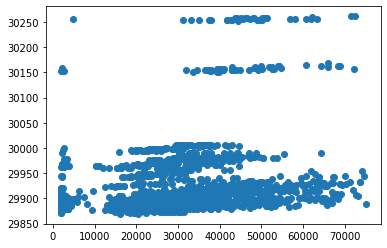

In [ ]:
plt.scatter(y_test,y_pred)

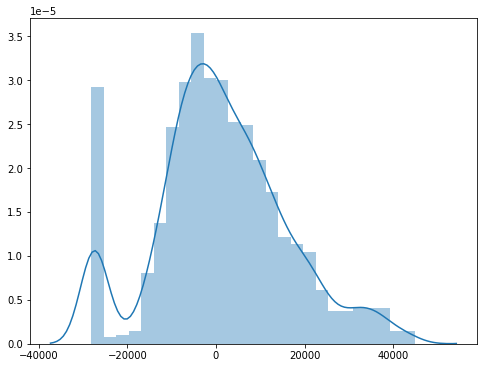

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot((y_test-y_pred))

This algorithm doesn't fit for the data so it is giving negative r2 score

# Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pre=regressor.predict(x_train)

In [ ]:
print('mean Squared Error:',mean_squared_error(y_test,y_pred))
print('root mean Squared Error:',np.sqrt((mean_squared_error(y_test,y_pred))))
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('r2 score for test set:',r2_score(y_test,y_pred))
print('r2 score for training set:',r2_score(y_train,y_pre))

mean Squared Error: 11357039.116355335
root mean Squared Error: 3370.020640345595
mean absolute error: 2450.9520406951133
r2 score for test set: 0.9491784763810939
r2 score for training set: 0.9798332767090676


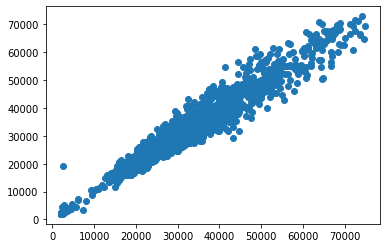

In [ ]:
plt.scatter(y_test,y_pred)

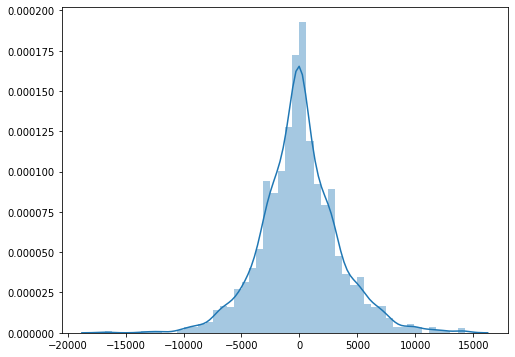

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot((y_test-y_pred))

Random Forest gave better r2 score than Linear regression but there is slight over fitting. Both root mean square error and mean absolute error reduced so it is a better fit.

# XGBOOST

In [ ]:
import xgboost as xg
data_dmatrix = xg.DMatrix(data=x,label=y) 
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)
xg_reg = xg.XGBRegressor(objective ='reg:linear')
xg_reg.fit(X_train,Y_train)
Y_pred = xg_reg.predict(X_test)
Y_pre = xg_reg.predict(X_train)

[08:28:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print('mean Squared Error:',mean_squared_error(Y_test,Y_pred))
print('root mean Squared Error:',np.sqrt((mean_squared_error(Y_test,Y_pred))))
print('mean absolute error:',mean_absolute_error(Y_test,Y_pred))
print('r2 score for test set:',r2_score(Y_test,Y_pred))
print('r2 score for training set:',r2_score(Y_train,Y_pre))

mean Squared Error: 21919172.623339903
root mean Squared Error: 4681.791604005874
mean absolute error: 3496.436565021892
r2 score for test set: 0.9019140695236559
r2 score for training set: 0.9125399529351493


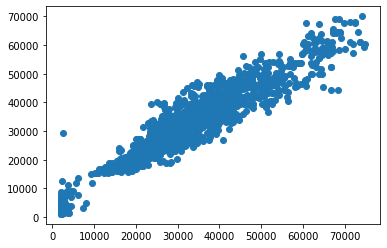

In [ ]:
plt.scatter(Y_test,Y_pred)

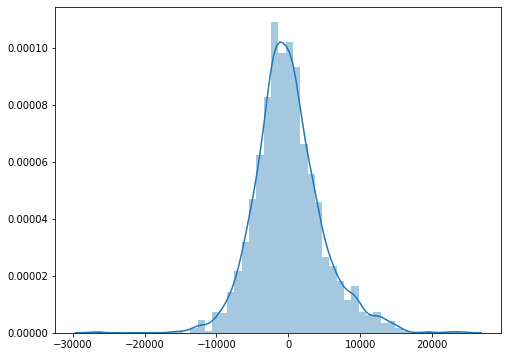

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot((Y_test-Y_pred))

XGBoost also gave great r2 score but comparitively less with Linear regression and Random Forest